## El Nino/Southern Oscillation (ENSO) -  Tropical Atmosphere Ocean (TAO)
- How can the data be used to predict weather conditions throughout the world? 
- How do the variables relate to each other? 
- Which variables have a greater effect on the climate variations? 
- Does the amount of movement of the buoy effect the reliability of the data? 


In [1]:
# setup absolute path to location of package Starts and config-file 
from inspect import getsourcefile
import os.path as path, sys
current_dir = path.dirname(path.abspath(getsourcefile(lambda:0)))
sys.path.insert(0, current_dir[:current_dir.rfind(path.sep)])

# import package Starts
from Starts.startvis import *
from Starts.startmodskl import *
rcParams['figure.figsize'] = 15, 6
%matplotlib inline

local_kwargs {'data_path': './data/elnino.csv, ./data/nonan_elnino.csv', 'drop_obj_col': False, 'nan_drop_col': False, 'nan_drop_row': False, 'nan_zero': False, 'nan_mean': True, 'nan_mean_neighbors': False}


In [2]:
nonan_data = idata[1]
nonan_data.head()

,Observation,Year,Month,Day,Date,Latitude,Longitude,Zonal Winds,Meridional Winds,Humidity,Air Temp,Sea Surface Temp
0,1,80,3,7,800307,-0.02,-109.46,-6.8,0.7,81.236525,26.14,26.24
1,2,80,3,8,800308,-0.02,-109.46,-4.9,1.1,81.236525,25.66,25.97
2,3,80,3,9,800309,-0.02,-109.46,-4.5,2.2,81.236525,25.69,25.28
3,4,80,3,10,800310,-0.02,-109.46,-3.8,1.9,81.236525,25.57,24.31
4,5,80,3,11,800311,-0.02,-109.46,-4.2,1.5,81.236525,25.30,23.19


In [3]:
StartML.nan_columns(nonan_data)

[]

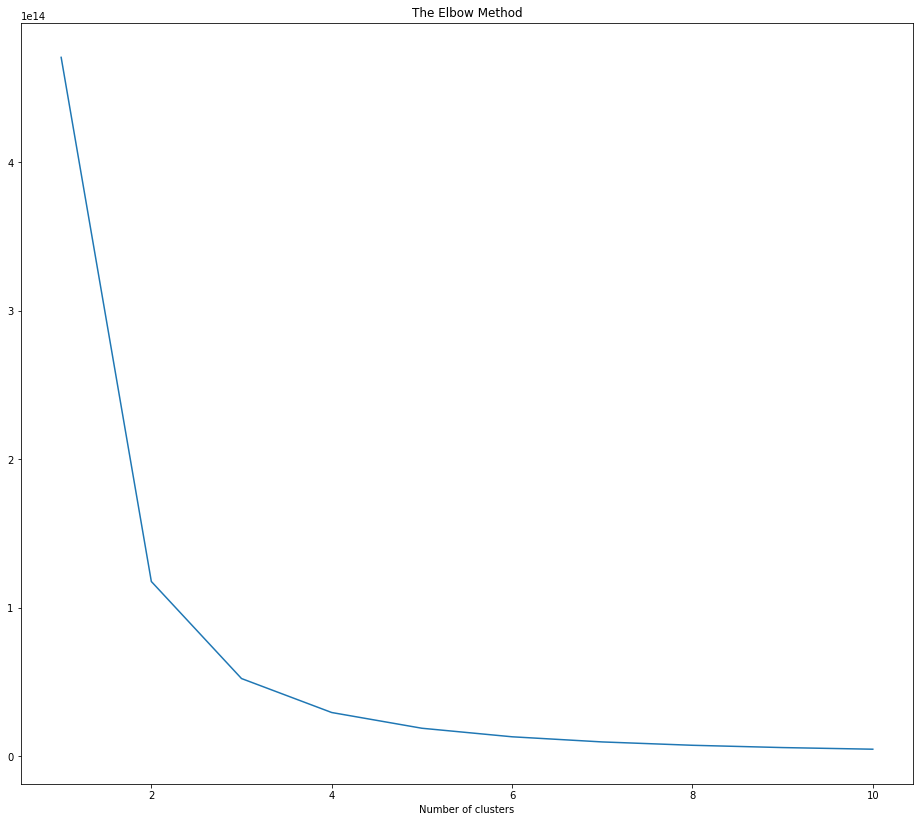

,cluster_errors,num_clusters
0,4.706133e+14,1
1,1.176543e+14,2
2,5.229043e+13,3
3,2.941997e+13,4
4,1.882562e+13,5
5,1.307430e+13,6
6,9.608726e+12,7
7,7.355120e+12,8
8,5.811208e+12,9
9,4.710082e+12,10


In [4]:
os = nonan_data[['Air Temp', 'Observation']]
ce = StartModSKL.clustering_k_mean_noc(os, plot=True)
ce

In [7]:
k_means, y_clusters = StartModSKL.clustering_k_mean(os, n_clusters=3)
k_means, y_clusters

(KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=100, tol=0.0001, verbose=0),
 array([1, 1, 1, ..., 0, 0, 0], dtype=int32))

In [8]:
len(os[y_clusters==0]), len(os[y_clusters==1]), len(os[y_clusters==2])

(59386, 59318, 59376)

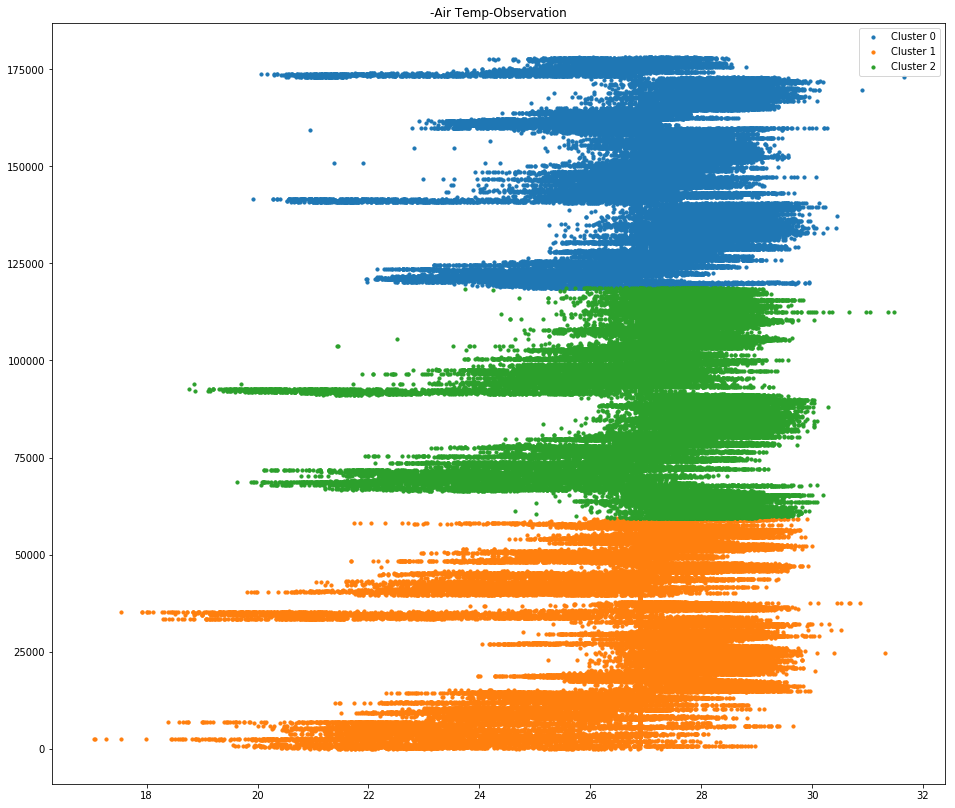

In [9]:
StartVis.vis_clustering(os, y_clusters)

### 1.Result: 
Based on result of clustering, we see that the air temperature changes when observations. 
The first observation (1.Cluster) range till ~60.000 shows that the temperature is inside the range of 15 till 31
and 2.Cluster shows that the temperature starts with min is 18.5 
and 3.Cluster shows that the temperature starts with min is 19.5 

Conclusion: The air temperature starts increasing time by time (observations)

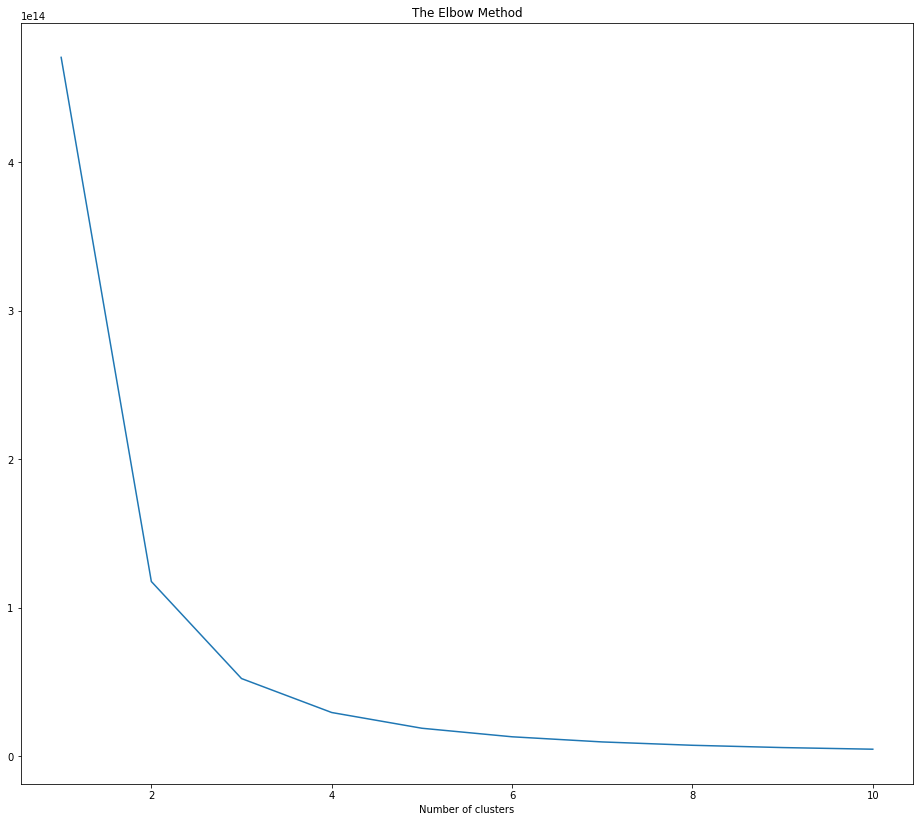

,cluster_errors,num_clusters
0,4.706133e+14,1
1,1.176543e+14,2
2,5.229043e+13,3
3,2.941997e+13,4
4,1.882562e+13,5
5,1.307430e+13,6
6,9.608729e+12,7
7,7.355120e+12,8
8,5.811208e+12,9
9,4.710082e+12,10


In [10]:
# tbd: do the same to Sea surface Temperature and Humidity
ssto = nonan_data[['Sea Surface Temp', 'Observation']]
ckm = StartModSKL.clustering_k_mean_noc(ssto, plot=True)
ckm

In [12]:
k_means, y_clusters = StartModSKL.clustering_k_mean(ssto, n_clusters=3)
k_means, y_clusters

(KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=100, tol=0.0001, verbose=0),
 array([1, 1, 1, ..., 0, 0, 0], dtype=int32))

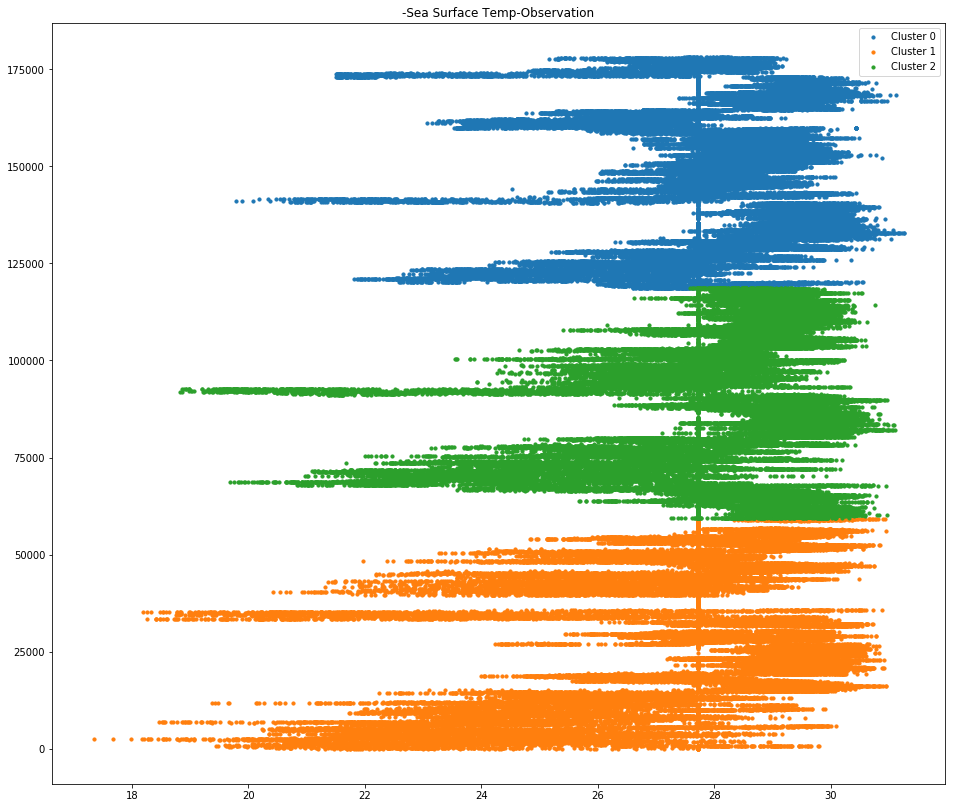

In [13]:
StartVis.vis_clustering(ssto, y_clusters)

### 2.Result: 
Based on result of clustering, we see that the air temperature changes when observations. 
The first observation (1.Cluster) range till ~60000 (observations) shows that the temperature is inside the range of 16 till 31
and 2.Cluster shows that the temperature starts with min is 18.5 
and 3.Cluster shows that the temperature starts with min is 19.5 

Conclusion: The Sea surface temperature starts increasing time by time (observations)

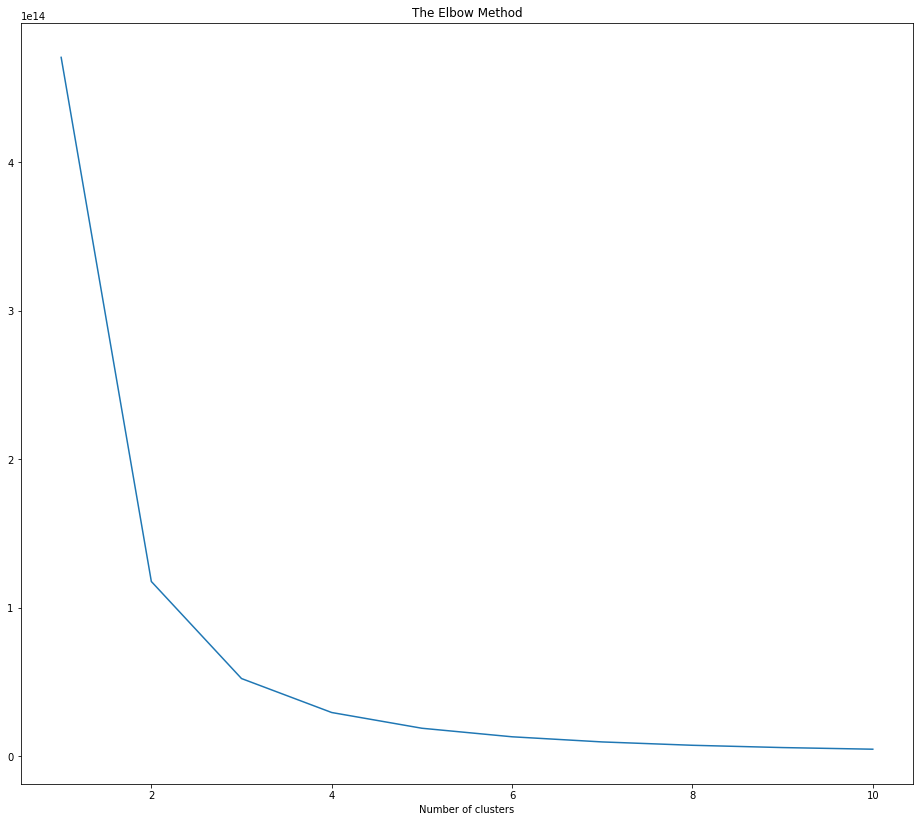

,cluster_errors,num_clusters
0,4.706133e+14,1
1,1.176543e+14,2
2,5.229043e+13,3
3,2.941997e+13,4
4,1.882562e+13,5
5,1.307431e+13,6
6,9.608729e+12,7
7,7.355121e+12,8
8,5.811210e+12,9
9,4.710091e+12,10


In [14]:
# tbd: do the same to Sea surface Temperature and Humidity
ho = nonan_data[['Humidity', 'Observation']]
ckm = StartModSKL.clustering_k_mean_noc(ho, plot=True)
ckm

In [16]:
k_means, y_clusters = StartModSKL.clustering_k_mean(ho, n_clusters=3)
k_means, y_clusters

(KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=100, tol=0.0001, verbose=0),
 array([1, 1, 1, ..., 0, 0, 0], dtype=int32))

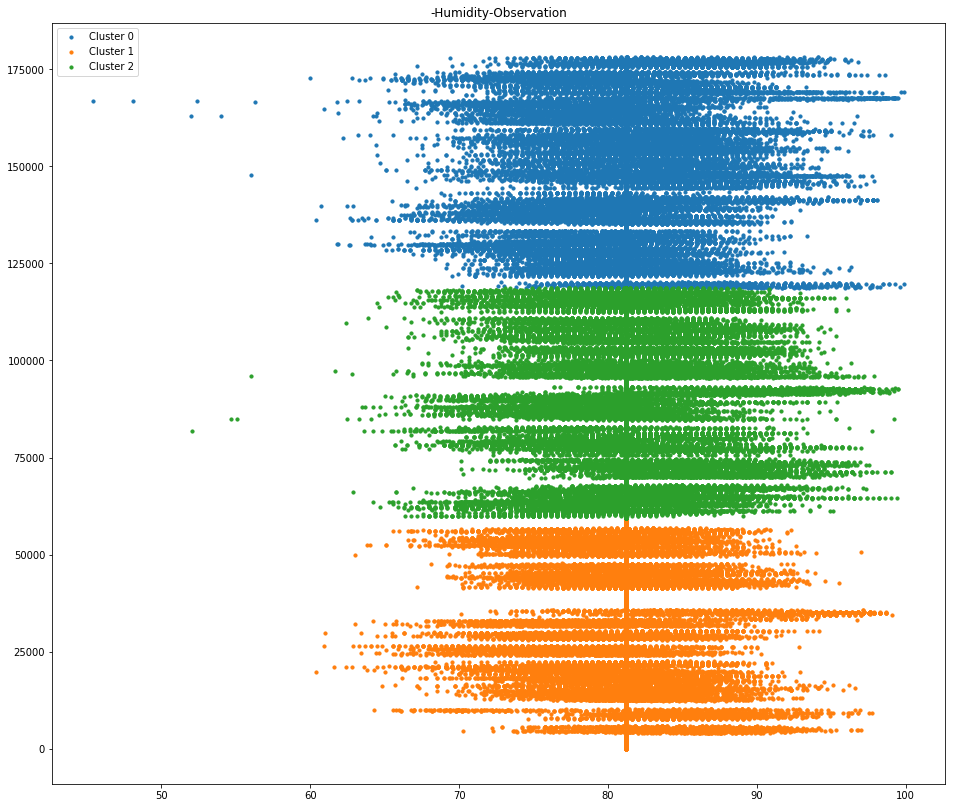

In [17]:
StartVis.vis_clustering(ho, y_clusters)

### 3.Result: 
there are few observation-points where their humidity are outlier but mostly the humidity is unchanged 
inside the range between 60 and 100

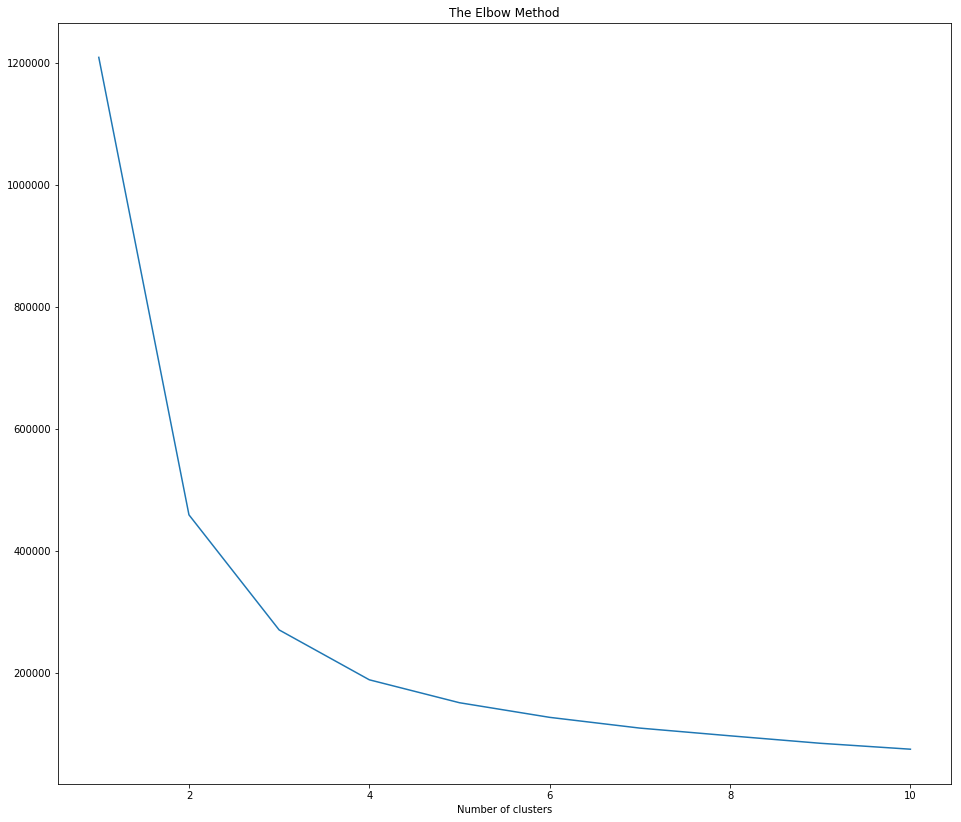

,cluster_errors,num_clusters
0,1.209204e+06,1
1,4.589540e+05,2
2,2.702475e+05,3
3,1.884438e+05,4
4,1.508438e+05,5
5,1.268619e+05,6
6,1.092428e+05,7
7,9.660029e+04,8
8,8.436416e+04,9
9,7.463218e+04,10


In [18]:
# Now we try to find out whether there's changes between 2 features Air Temperature and Sea Surface Temperature by time
ats = nonan_data[['Air Temp', 'Sea Surface Temp']]
ckm = StartModSKL.clustering_k_mean_noc(ats, plot=True)
ckm

In [19]:
k_means, y_clusters = StartModSKL.clustering_k_mean(ats, n_clusters=3)
k_means, y_clusters

(KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=100, tol=0.0001, verbose=0),
 array([0, 0, 0, ..., 0, 2, 0], dtype=int32))

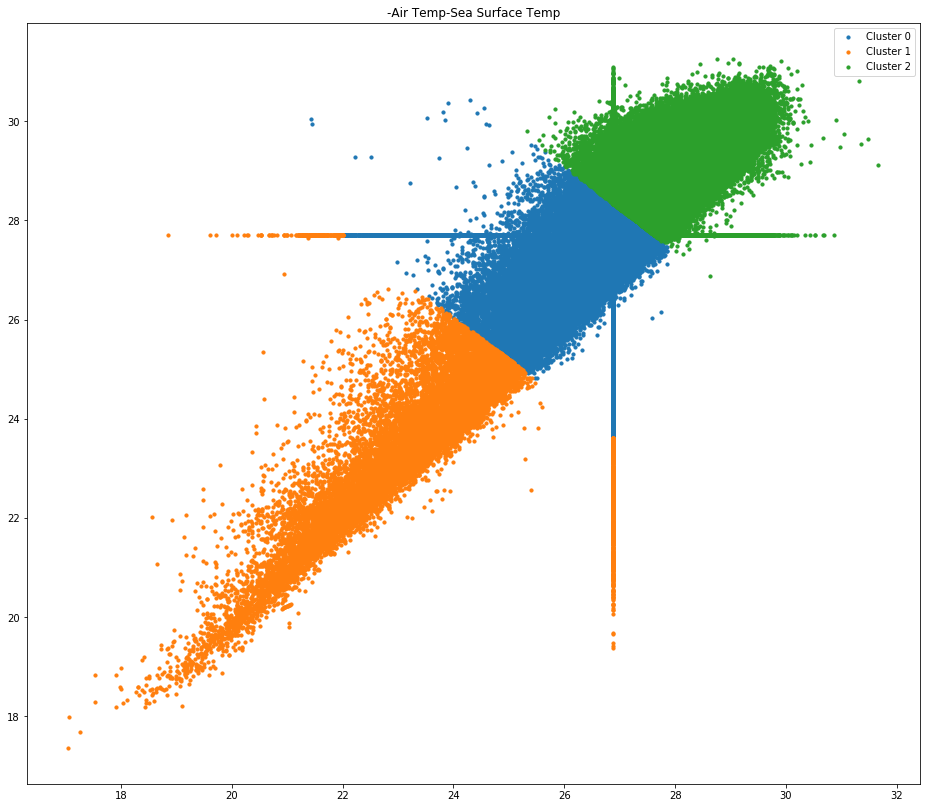

In [20]:
StartVis.vis_clustering(ats, y_clusters)

### 4.Result: 
Air temperature and Sea surface temperature seems to be linear(?)

In [ ]:
# ToDo: find the correlation between temperature and latitude (longitude) to know 
# where exactly temperature have been changing (increasing/ decreasing)